In [35]:
import camelot
import numpy as np
import pandas as pd

In [220]:
new_header = ['Tran Date','Particulars','Debit','Credit','Balance','Init.Br']

In [221]:
file = "Bank_Statements/axis1bs.pdf"

In [222]:
import pdfplumber

with pdfplumber.open(file) as pdf:
    
    total_pages = pdf.pages
total = len(total_pages)
total

3

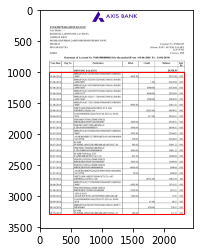

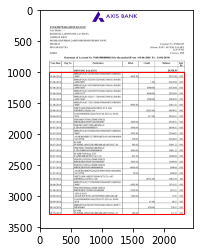

In [223]:
tables = camelot.read_pdf(file, table_regions=['20,1080,2300,3300'])
camelot.plot(tables[0], kind='contour')


In [224]:
def processing(data):
    data = data.drop(columns=data.columns[1])
    data.columns = new_header 
    data = data.replace(r'^\s*$', np.nan, regex=True)
                       
    data['Debit'] = data['Debit'].astype(float, errors = 'raise')
    data['Credit'] = data['Credit'].astype(float, errors = 'raise')
    data['Balance'] = data['Balance'].astype(float, errors = 'raise')
    return data

In [225]:
df = processing(tables[0].df)

In [226]:
for i in range(2,total+1):
    
    
    tables = camelot.read_pdf(file,flavor='lattice',pages=str(i))
    if len(tables)!=0:
        df1 = processing(tables[0].df)
        df = pd.concat([df, df1])
        
df = df.fillna(0)

In [227]:
df = df[:-2]
df.index = range(df.shape[0])
df

,Tran Date,Particulars,Debit,Credit,Balance,Init.Br
0,04-06-2018,IMPS/P2A/815417983947/35968958555SBIN001\n3040/,4005.90,0.0,20319.01,020
1,07-06-2018,IMPS/P2A/815821505322/918655566361/MOBU\nA6962...,0.00,1.0,20320.01,020
2,07-06-2018,IMPS/P2A/815821508926/918655566361/MOBU\nA6963...,0.00,5000.0,25320.01,020
3,07-06-2018,IMPS/P2A/815821509371/918655566361/MOBU\nA6963...,0.00,4000.0,29320.01,020
4,07-06-2018,IMPS/P2A/815821511724/918655566361/MOBU\nA6963...,0.00,1500.0,30820.01,020
5,21-06-2018,IMPS/P2A/817223138848/35968958555SBIN001\n3040/,9005.90,0.0,21814.11,020
6,29-06-2018,NEFT/180629841GN01989/TATA AIG\nGENERAL/Salary...,0.00,12385.0,34199.11,002
7,30-06-2018,916010084080634:Int.Pd:01-04-2018 to 30-06-\n2018,0.00,147.0,34346.11,020
8,03-07-2018,INB/586973790/ATOM STOCK\nBROKERS/500091601008...,5000.00,0.0,29346.11,020
9,10-07-2018,INB/589108673/SHAREKHAN\nLTD./916010084080634,5000.00,0.0,24346.11,020


In [219]:
tables = camelot.read_pdf("Bank_Statements/icici2bs.pdf",flavour="stream") 
tables

<TableList n=0>

In [217]:
tables[1].df

,0
0,Legends for transactions in your account state...
1,VAT/MAT/NFS - Cash withdrawal at other Bank AT...
